In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from class_features import Features
from class_models import Linear, GLM
import scipy.stats as scs

In [15]:
metadata = pd.read_excel('data/Data Dictionary.xlsx')
Train = pd.read_csv('data/Train.csv',low_memory=False)
Test = pd.read_csv('data/Test.csv')



NameError: name 'isnull' is not defined

In [17]:
# #Target variable histograms
# fig, axs=plt.subplots(1,2)
# axs[0].hist(Train['SalePrice'])
# axs[0].set_title('Sale Price')
# axs[1].hist(np.log(Train['SalePrice']))
# axs[1].set_title('Log of Sale Price')
# # plt.savefig('logSalePrice.png')


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [26]:
#Features
X=Features().age(Train)
y = Train['SalePrice']

In [27]:
#Linear model with log transformed target variable
linear = Linear(X,np.log(y))
X

,Age,Age_sq
0,2.000000,4.000000
1,8.000000,64.000000
2,3.000000,9.000000
3,10.000000,100.000000
4,2.000000,4.000000
5,4.000000,16.000000
6,11.000000,121.000000
7,4.000000,16.000000
8,1.000000,1.000000
9,10.220477,104.458154


In [6]:
linear.cv_mse(5)

0.17123040418401175

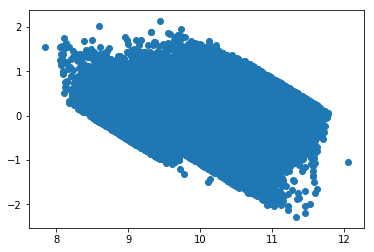

In [7]:
linear.resid_scatter(X,np.log(y))
plt.savefig('heteroscad.png')

In [8]:
linear.model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Sat, 16 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:35:28   Log-Likelihood:            -1.8843e+05
No. Observations:              401125   AIC:                         3.770e+05
Df Residuals:                  401073   BIC:                         3.775e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.5743      0.021    498.357      0.000      10.533      10.616
Conventional                    -0.0727      0.004    -16.542      0.000      -0.081      -0.064
PAT                             -0.2235      0.004    -54.073      0.000      -0.232      -0.215
None or Unspecified             -0.2061      0.005    -43.019      0.000      -0.215      -0.197
Straight                        -0.1179      0.004    -26.441      0.000      -0.127      -0.109
Rubber                           0.8237      0.010     80.445      0.000       0.804       0.844
Steel                            0.9547      0.009    101.197      0.000       0.936       0.973
20.5                            -0.0295      0.004     -8.113      0.000      -0.037      -0.022
Standard                         0.1119      0.003     36.268      0.000       0.106       0.118
Extended                        -0.5457      0.387     -1.410      0.159      -1.304       0.213
Standard                        -0.6106      0.387     -1.577      0.115      -1.369       0.148
All Wheel Drive                  1.0899      0.021     52.948      0.000       1.050       1.130
Four Wheel Drive                 0.4551      0.387      1.175      0.240      -0.304       1.214
No                               1.1295      0.016     69.641      0.000       1.098       1.161
Two Wheel Drive                  0.2854      0.387      0.737      0.461      -0.474       1.044
product_class_Backhoe_Loader     0.0943      0.003     31.208      0.000       0.088       0.100
Compact                         -0.4870      0.006    -87.908      0.000      -0.498      -0.476
Large                            0.5957      0.004    156.719      0.000       0.588       0.603
Large / Medium                   0.3196      0.009     34.378      0.000       0.301       0.338
Medium                           0.4399      0.002    176.663      0.000       0.435       0.445
Mini                            -0.6867      0.010    -71.223      0.000      -0.706      -0.668
Small                           -0.0154      0.009     -1.637      0.102      -0.034       0.003
Tennessee                        0.0077      0.004      1.913      0.056      -0.000       0.016
Pennsylvania                    -0.0534      0.004    -13.087      0.000      -0.061      -0.045
South Carolina                  -0.0089      0.004     -2.174      0.030      -0.017      -0.001
Illinois                         0.0345      0.004      8.974      0.000       0.027       0.042
New Jersey                       0.0514      0.004     13.158      0.000       0.044       0.059
North Carolina                  -0.0164      0.004     -4.133      0.000      -0.024      -0.009
Mississippi                      0.0159      0.004      4.400      0.000    

In [6]:
#GLM Gamma family with log-link
glm = GLM(X,y)

In [10]:
glm.cv_mse(5)

/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:696: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:754: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1129: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


MemoryError: 

In [ ]:
glm.resid_scatter(X,y)

In [ ]:
glm.model_summary()

In [7]:
# Predictions Test data
X_test=Features().features_clean(Test)

Test['SalePrice_glm'] = glm.predict_y(X_test)
Test['SalePrice_linear'] = np.exp(linear.predict_y(X_test))

/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:696: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:754: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/justin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1129: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


MemoryError: 

In [8]:
#Kernel density estimation
kde_linear = scs.gaussian_kde(Test['SalePrice_linear'])
kde_glm = scs.gaussian_kde(Test['SalePrice_glm'])

xx = np.linspace(0, 100000, 100)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xx, kde_linear(xx), label = 'Predicted Sale Price Linear Regression')
ax.plot(xx, kde_glm(xx), label = 'Predicted Sale Price GLM')
ax.legend()

KeyError: 'SalePrice_linear'